HIT AND MISS

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy

path=r'D:/Study/Python/openCV/College/res/'

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


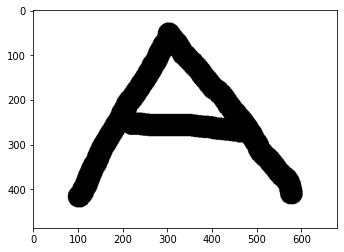

In [2]:
img = cv2.imread(path+'A.png',0)
plt.imshow(img,'gray')
print(img)

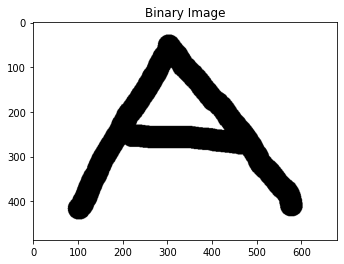

In [3]:
# blur = cv2.GaussianBlur(img,(5,5),0)
(thresh, blackAndWhiteImage) = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Binary Image')
plt.imshow(blackAndWhiteImage,'gray')

In [4]:
struc_ele1=np.array([[255,255,255],[999,0,999],[0,0,0]]) 
struc_ele2=np.array([[999,255,255],[0,0,255],[0,0,999]])
struc_ele3=np.array([[0,0,0],[999,0,999],[255,255,255]])
struc_ele4=np.array([[0,0,999],[0,0,255],[999,255,255]])
struc_ele5=np.array([[0,0,0],[999,0,999],[255,255,255]])
struc_ele6=np.array([[999,0,0],[255,0,0],[255,255,999]])
struc_ele7=np.array([[255,999,0],[255,0,0],[255,999,0]])
struc_ele8=np.array([[255,255,999],[255,0,0],[999,0,0]])
ele=[struc_ele1,struc_ele2,struc_ele3,struc_ele4,struc_ele5,struc_ele6,struc_ele7,struc_ele8]

In [5]:
result=[]

padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        padded_arr[i+1][j+1] = blackAndWhiteImage[i][j]

img1=np.zeros(img.shape,'uint8')
for e in range(len(ele)):
    # result.append(hitormiss(blackAndWhiteImage,ele[i]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            index1=0
            c=True
            for k in range(i,i+3):
                index2=0
                for l in range(j,j+3):
                    if(padded_arr[k][l]!=ele[e][index1][index2] and ele[e][index1][index2] != 999):
                        c=False
                    index2+=1
                index1+=1
            if(c):
                img1[i][j]=255
            else:
                img1[i][j]=0

        temp=copy.deepcopy(img1)
        result.append(temp)

In [6]:
new_img=np.zeros(img.shape,'uint8')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp=0
        for k in range(len(result)):
            temp= temp or result[k][i][j]

        new_img[i][j]=temp

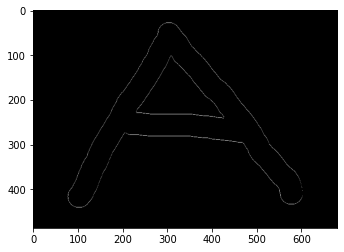

In [7]:
plt.imshow(new_img,'gray')

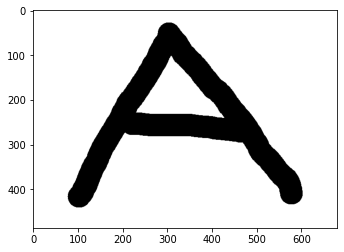

In [8]:
thinning = np.zeros(img.shape,'uint16')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        thinning[i][j]=blackAndWhiteImage[i][j]-new_img[i][j]

plt.imshow(thinning,'gray')